In [139]:
%matplotlib inline

In [158]:
import pandas as pd
from sklearn import tree, model_selection, linear_model, naive_bayes, ensemble
import matplotlib.pyplot as plt 

In [141]:
TEST_DATA = "./data/test.csv"
TRAIN_DATA = "./data/train.csv"

In [142]:
X_orig = pd.read_csv(TRAIN_DATA, index_col="Id")
# X_test = pd.read_csv(TEST_DATA, index_col="Id")

In [143]:
def explore_df(df):
    print(df.shape)
    print(df.columns)
    print(df.describe())
    print(df.head())

In [144]:
explore_df(X)

(4000000, 54)
Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39'

[Explanation of the data](https://www.kaggle.com/c/forest-cover-type-prediction/data)

Goal is to predict the `Cover_Type`

In [145]:
COVER_TYPE = {
    1: "Spruce/Fir",
    2: "Lodgepole Pine",
    3: "Ponderosa Pine",
    4: "Cottonwood/Willow",
    5: "Aspen",
    6: "Douglas-fir",
    7: "Krummholz",
}

In [146]:
y = X_orig["Cover_Type"]

In [147]:
X = X_orig.drop(columns=["Cover_Type"])

In [148]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size=.2, random_state=5)

I don't see anything extremely obviously not useful from the initial data set. Some initial thoughts though: 

- wilderness area designation may be extraneous
- aspect, slope, elevation -- would it make sense to normalize these in any way? something to think about.

Going to try just building a simple decision tree model to see what type of accuracy I can get with classifier and then will explore the data a bit more. 

# Data Cleaning

In [149]:
has_null = [col for col in X_train.columns if X_train[col].isnull().values.any()]
has_null

[]

I guess this is a pretty easy data set to work with?

# DecisionTreeClassifier

In [39]:
cols = X_train.columns
cols

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [150]:
soil_cols = [col for col in X_train.columns if col.startswith("Soil")]
wild_cols = [col for col in X_train.columns if col.startswith("Wilderness")]
other_cols = [col for col in X_train.columns if col not in soil_cols and col not in wild_cols]
soil_cols, wild_cols, other_cols

(['Soil_Type1',
  'Soil_Type2',
  'Soil_Type3',
  'Soil_Type4',
  'Soil_Type5',
  'Soil_Type6',
  'Soil_Type7',
  'Soil_Type8',
  'Soil_Type9',
  'Soil_Type10',
  'Soil_Type11',
  'Soil_Type12',
  'Soil_Type13',
  'Soil_Type14',
  'Soil_Type15',
  'Soil_Type16',
  'Soil_Type17',
  'Soil_Type18',
  'Soil_Type19',
  'Soil_Type20',
  'Soil_Type21',
  'Soil_Type22',
  'Soil_Type23',
  'Soil_Type24',
  'Soil_Type25',
  'Soil_Type26',
  'Soil_Type27',
  'Soil_Type28',
  'Soil_Type29',
  'Soil_Type30',
  'Soil_Type31',
  'Soil_Type32',
  'Soil_Type33',
  'Soil_Type34',
  'Soil_Type35',
  'Soil_Type36',
  'Soil_Type37',
  'Soil_Type38',
  'Soil_Type39',
  'Soil_Type40'],
 ['Wilderness_Area1',
  'Wilderness_Area2',
  'Wilderness_Area3',
  'Wilderness_Area4'],
 ['Elevation',
  'Aspect',
  'Slope',
  'Horizontal_Distance_To_Hydrology',
  'Vertical_Distance_To_Hydrology',
  'Horizontal_Distance_To_Roadways',
  'Hillshade_9am',
  'Hillshade_Noon',
  'Hillshade_3pm',
  'Horizontal_Distance_To_Fire_P

In [41]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train[other_cols], y_train)

DecisionTreeClassifier()

In [44]:
preds = clf.predict(X_valid[other_cols])

In [151]:
def classification_accuracy(predictions, actual):
    return ((predictions == actual).sum() / len(actual)) * 100

In [52]:
print(f"Accuracy was {classification_accuracy(preds, y_valid)}%")

Accuracy was 89.12412499999999%


So that's not terrible? Top of leaderboard is 95% or so. So can do better!

Going to explore the features a bit more by just doing some plotting (and getting practice with that).

# Plot ideas

- show each feature as a distribution by class.
- scatter plot of feature pairs, with colors for each class to see any correlations.
- what would be the best way to explore if the wilderness area or the soil types are useful?

In [96]:
def hist(col):
    fig, ax = plt.subplots(figsize=(12, 8))
    for i in range(1, 8):  # each of the 7 classifications
        ax.hist(X_orig[X_orig.Cover_Type == i][col], bins=50, alpha=0.8, label=f"{i} - {COVER_TYPE[i]}")
        ax.legend()
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.set_title(f"Distribution of {col} by Cover_Type")
    plt.show()

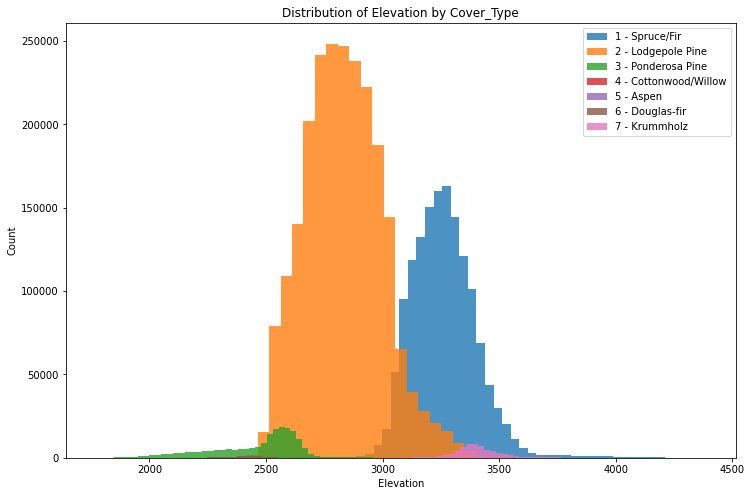

None


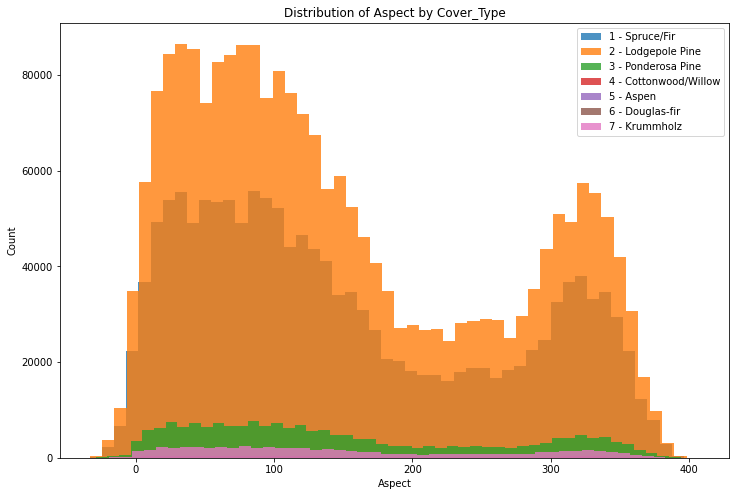

None


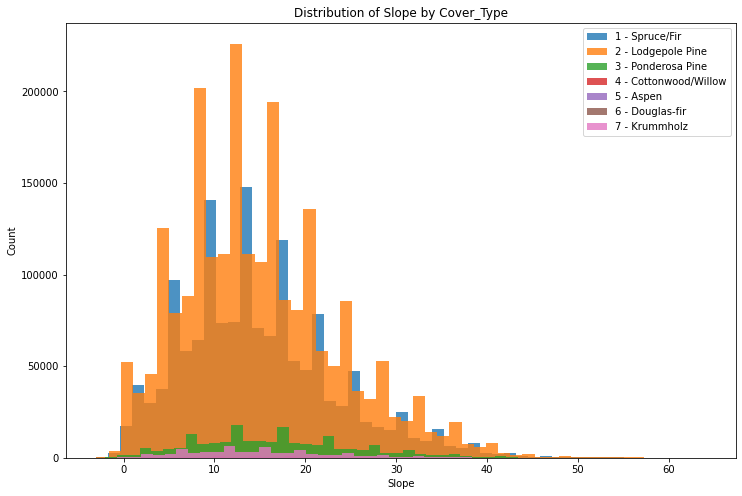

None


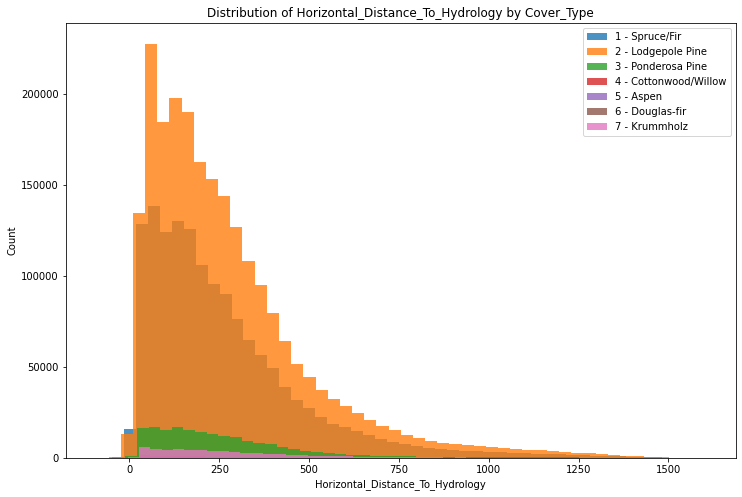

None


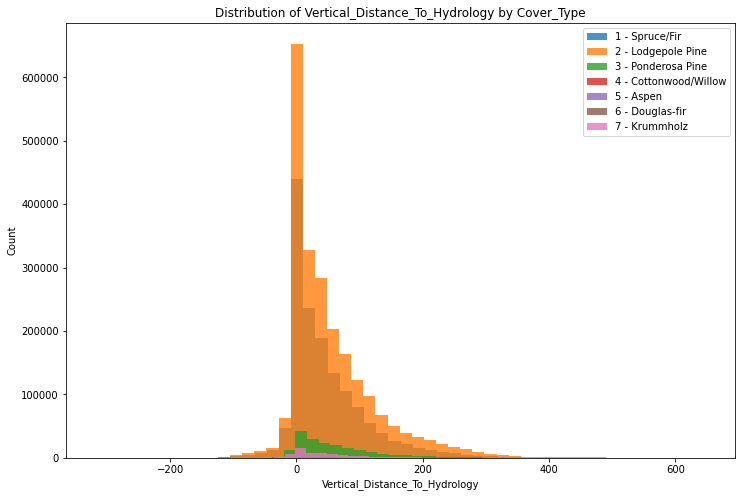

None


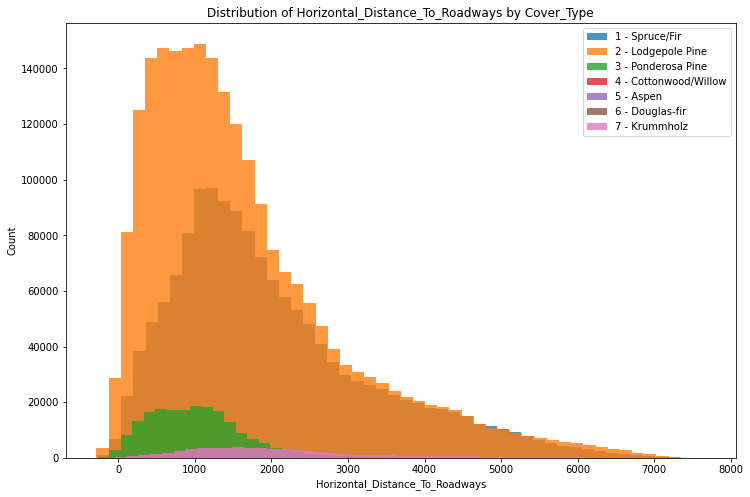

None


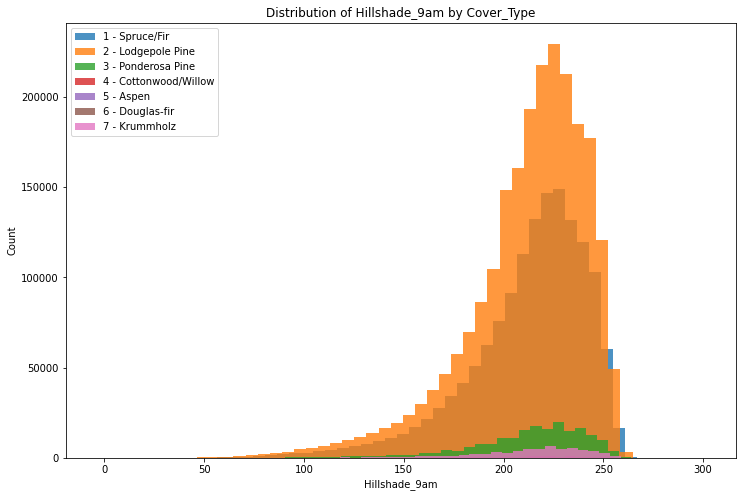

None


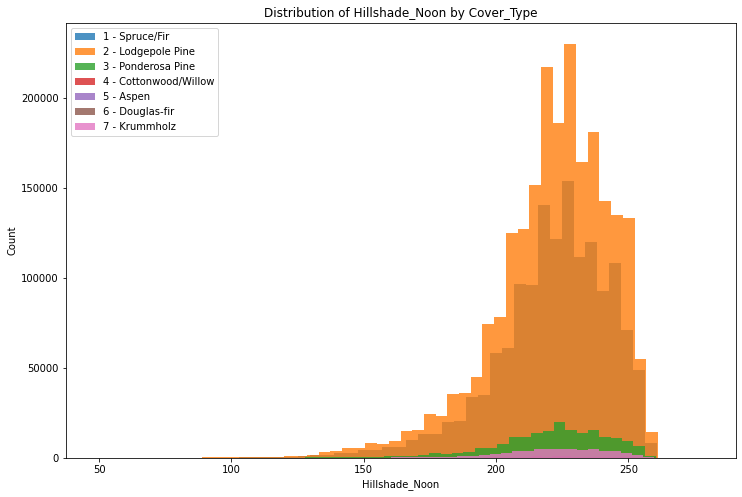

None


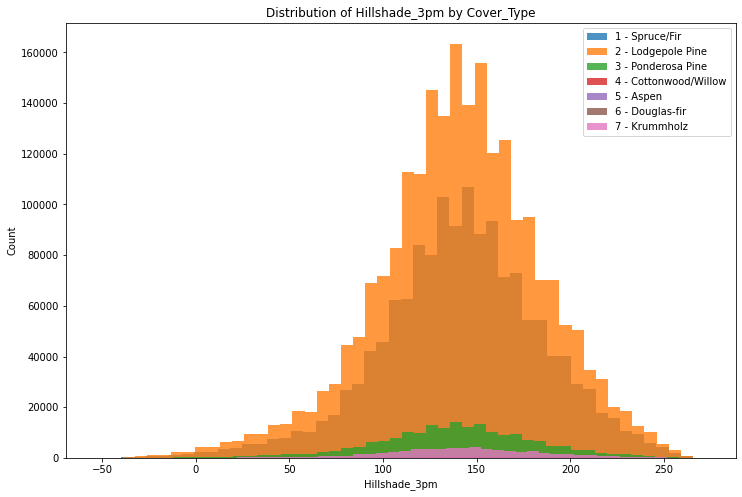

None


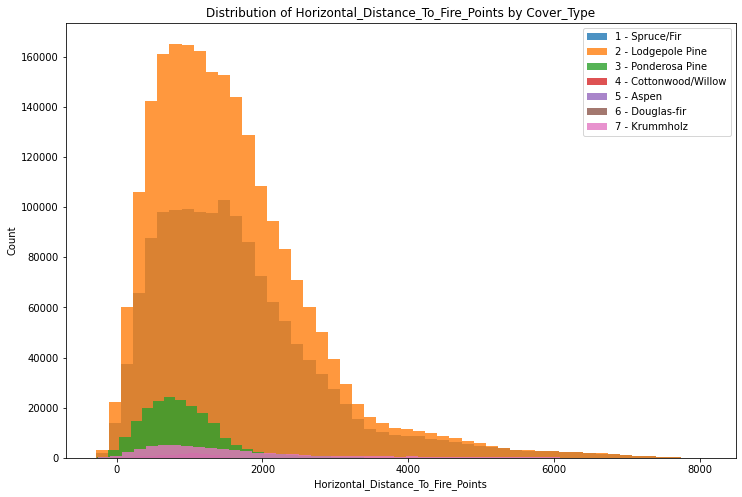

None


In [97]:
for col in other_cols:
    print(hist(col))

In [92]:
X_orig.Cover_Type.value_counts()

2    2262087
1    1468136
3     195712
7      62261
6      11426
4        377
5          1
Name: Cover_Type, dtype: int64

Interesting -- we just have a few examples in the training data of a couple of classifications. I wonder what this means or how it will impact the predictions? Should I have normalized the distribution above?

In [121]:
wild_heat = X_orig.groupby("Cover_Type")[wild_cols].sum()
wild_heat

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
Cover_Type,,,,
1,438363,86903,860131,0
2,603399,74686,1573172,2661
3,31,2048,120129,75583
4,0,1,0,377
5,0,0,1,0
6,1,125,2778,8655
7,2978,2881,58082,0


In [122]:
soil_heat = X_orig.groupby("Cover_Type")[soil_cols].sum()
soil_heat

,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Cover_Type,,,,,,,,,,,,,,,,,,,,,
1,22355,37647,1151,48314,21941,8030,0,4219,15925,48667,...,42286,64736,57886,17828,23096,15148,16776,63824,54513,47039
2,37682,64188,8571,85916,35818,12100,0,6805,25866,144135,...,62659,79342,87065,27419,35986,24675,28265,86196,84048,68039
3,6084,18983,6913,14172,3703,10357,0,291,839,15347,...,1294,424,864,978,1129,770,862,685,1064,1235
4,39,30,142,20,8,68,0,3,4,22,...,7,0,3,6,3,7,8,2,4,8
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,413,848,261,419,227,1008,0,55,161,6917,...,284,110,220,231,227,144,187,165,254,262
7,793,1888,64,2809,1164,328,0,226,777,3075,...,3443,5236,5245,1518,3773,2107,2732,12134,17074,9891


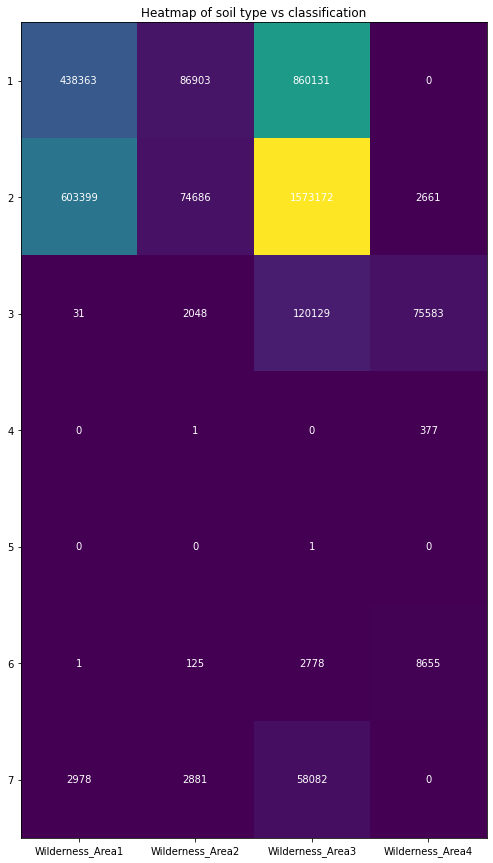

In [134]:
fig, ax = plt.subplots(figsize=(20, 15))
im = ax.imshow(wild_heat)
ax.set_yticks(range(7), labels=wild_heat.index)
ax.set_xticks(range(len(wild_cols)), labels=wild_cols)
for y, classification in enumerate(wild_heat.index):
    for x, wild_area in enumerate(wild_cols):
        ax.text(x, y, wild_heat.loc[classification, wild_area], ha="center", va="center", color="w")
ax.set_title("Heatmap of wilderness area vs classification")
# fig.tight_layout()
plt.show()

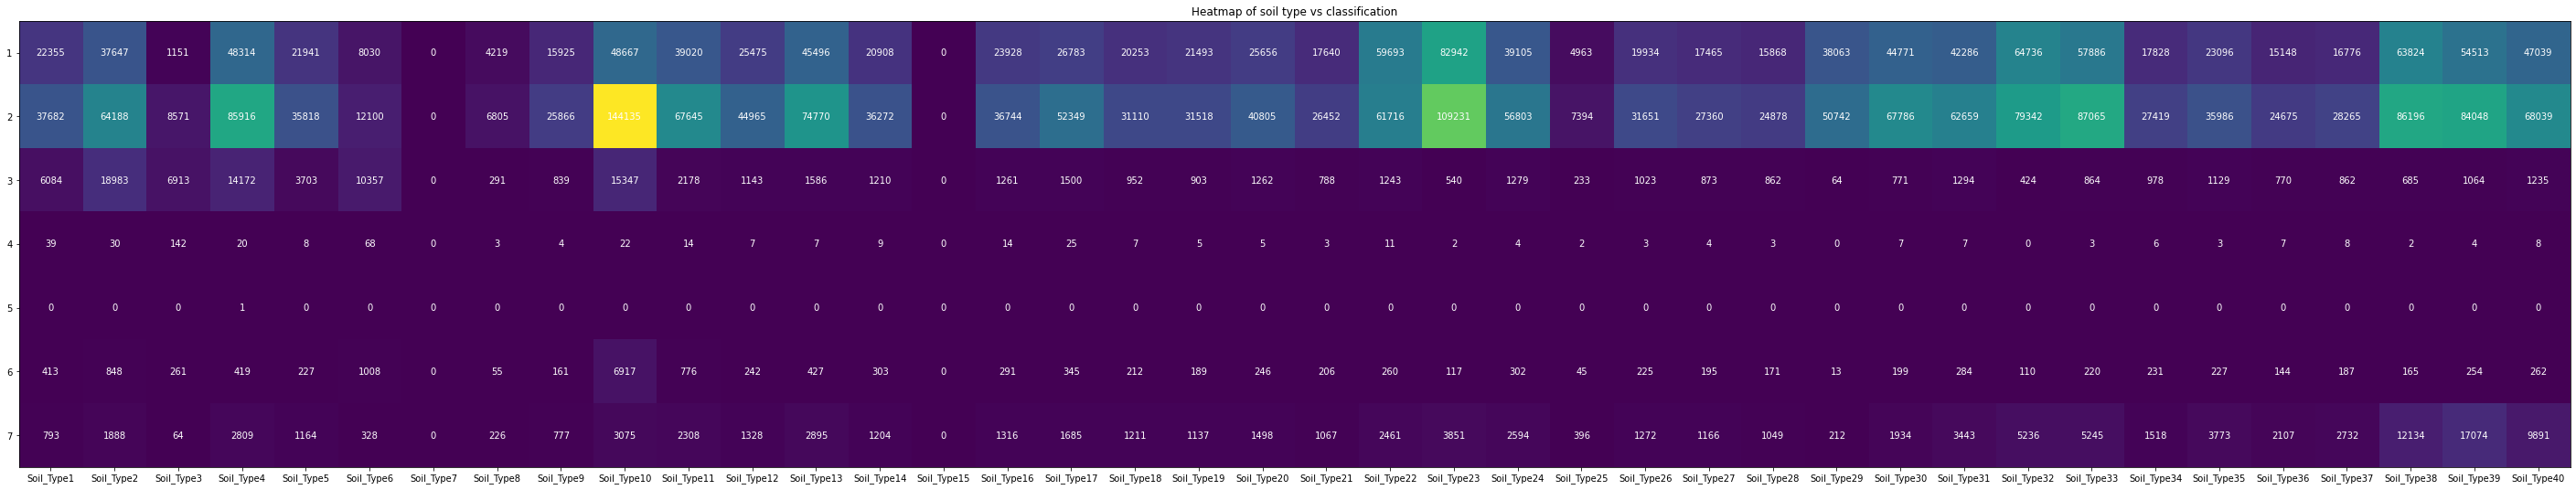

In [136]:
fig, ax = plt.subplots(figsize=(50, 25))
im = ax.imshow(soil_heat)
ax.set_yticks(range(7), labels=soil_heat.index)
ax.set_xticks(range(len(soil_cols)), labels=soil_cols)
for y, classification in enumerate(soil_heat.index):
    for x, soil_type in enumerate(soil_cols):
        ax.text(x, y, soil_heat.loc[classification, soil_type], ha="center", va="center", color="w")
ax.set_title("Heatmap of soil type vs classification")
# fig.tight_layout()
plt.show()

I think I need to normalize the data, because it's throwing off all my distribution visualizations.

Just for fun going to try and build a few more models to see if I can get a better accuracy (because I didn't figure out much yet with the data exploration).

# Random Forest

In [159]:
clf = ensemble.RandomForestClassifier()
clf.fit(X_train[other_cols], y_train)

RandomForestClassifier()

In [162]:
preds = clf.predict(X_valid[other_cols])

In [163]:
print(f"Accuracy was {classification_accuracy(preds, y_valid)}%")

Accuracy was 91.39375%


In [166]:
clf_1 = tree.DecisionTreeClassifier()
%timeit clf.fit(X_train[other_cols + soil_cols], y_train)

KeyboardInterrupt: 

In [ ]:
preds_1 = clf_1.predict(X_valid[other_cols + soil_cols])
print(f"Accuracy was {classification_accuracy(preds_1, y_valid)}%")